In [1]:
#install.packages("readr")
#install.packages("dplyr")
#install.packages("ggplot2")
#install.packages("caret")
#install.packages("randomForest")
#install.packages("e1071")

In [2]:
# Load the necessary libraries
library(readr)
library(dplyr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [3]:
# Read the dataset
phishing_data <- read.csv("webpage_phishing.csv")

In [4]:
# Display the first few rows of the dataset
head(phishing_data)

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
4,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,32,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [47]:
tail(phishing_data)

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
100072,20,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
100073,23,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100074,34,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0
100075,70,2,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
100076,28,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
100077,16,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
str(phishing_data)

'data.frame':	100077 obs. of  20 variables:
 $ url_length    : int  37 77 126 18 55 32 19 81 42 104 ...
 $ n_dots        : int  3 1 4 2 2 3 2 2 2 1 ...
 $ n_hypens      : int  0 0 1 0 2 1 0 0 0 10 ...
 $ n_underline   : int  0 0 2 0 0 0 0 0 0 0 ...
 $ n_slash       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_questionmark: int  0 0 1 0 0 0 0 0 0 0 ...
 $ n_equal       : int  0 0 3 0 0 0 0 0 0 0 ...
 $ n_at          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_and         : int  0 0 2 0 0 0 0 0 0 0 ...
 $ n_exclamation : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_space       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_tilde       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_comma       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_plus        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_asterisk    : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_hastag      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_dollar      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_percent     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ n_redirection : int  0 1 1 1 1 1 1 1 0 0 ...
 $ phishing      : int  0 1 1 0

In [49]:
nrow(phishing_data)

[1] 100077

In [8]:
ncol(phishing_data)

[1] 20

In [9]:
names(phishing_data)

[1] "url_length"     "n_dots"         "n_hypens"       "n_underline"   
 [5] "n_slash"        "n_questionmark" "n_equal"        "n_at"          
 [9] "n_and"          "n_exclamation"  "n_space"        "n_tilde"       
[13] "n_comma"        "n_plus"         "n_asterisk"     "n_hastag"      
[17] "n_dollar"       "n_percent"      "n_redirection"  "phishing"

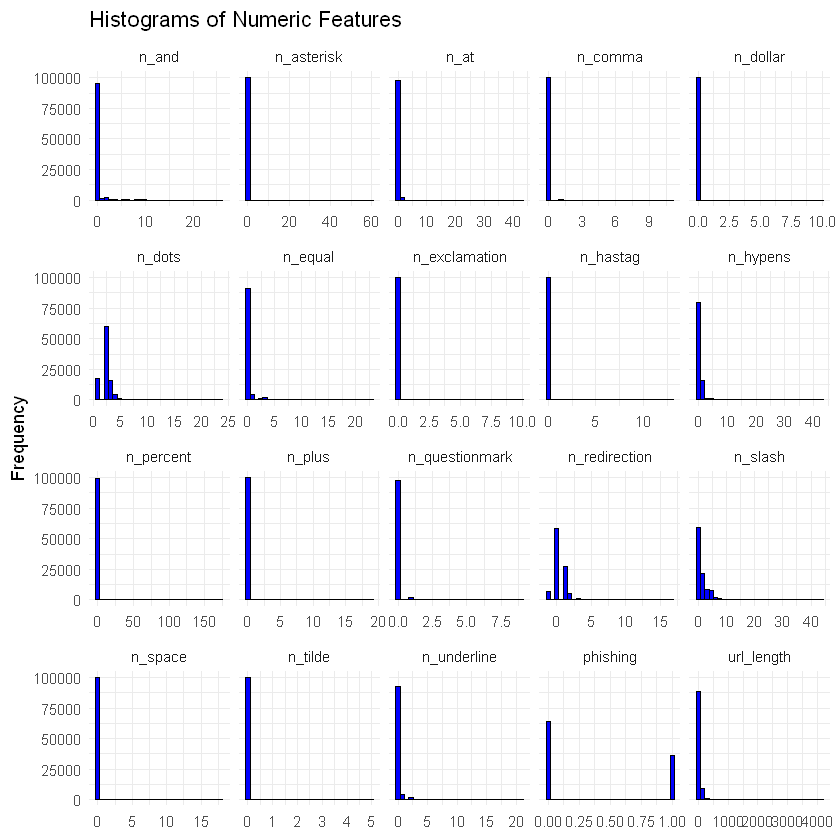

In [10]:
#install.packages("tidyr")
library(tidyr)
# Create histograms for each numeric feature
phishing_data %>%
  select(where(is.numeric)) %>%
  gather() %>%
  ggplot(aes(value)) +
  geom_histogram(bins = 30, fill = "blue", color = "black") +
  facet_wrap(~key, scales = "free_x") +
  theme_minimal() +
  labs(title = "Histograms of Numeric Features", x = NULL, y = "Frequency")

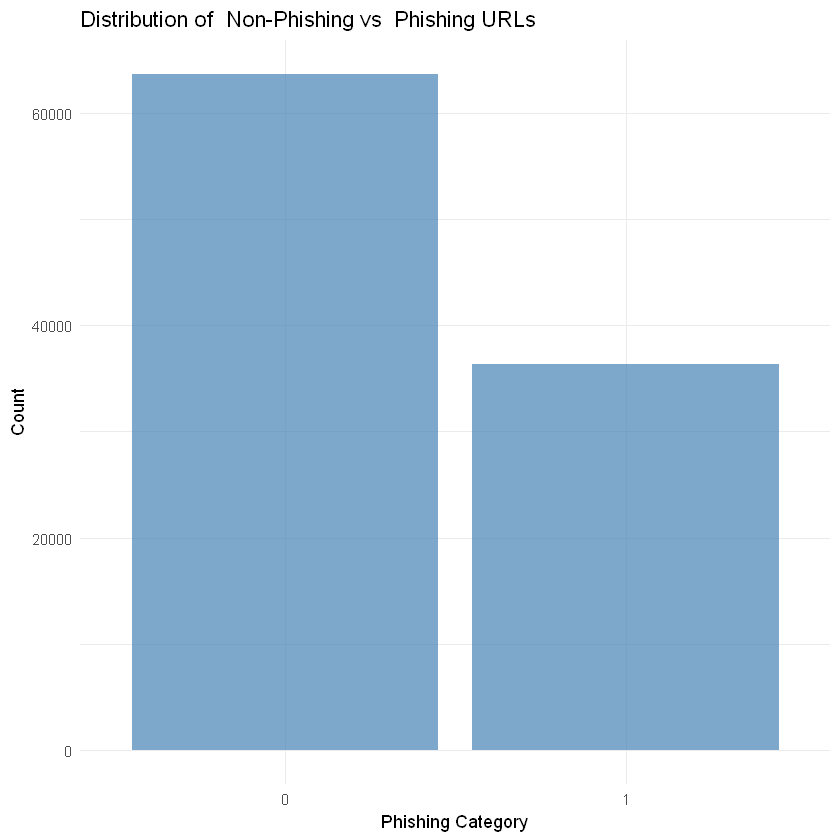

In [11]:
# Plotting the distribution of the target variable 'phishing'
ggplot(phishing_data, aes(x = factor(phishing))) +
  geom_bar(fill = "steelblue", alpha = 0.7) +
  labs(x = "Phishing Category", y = "Count", title = "Distribution of  Non-Phishing vs  Phishing URLs") +
  theme_minimal()


In [50]:
sum(colSums(is.na(phishing_data)))

[1] 0

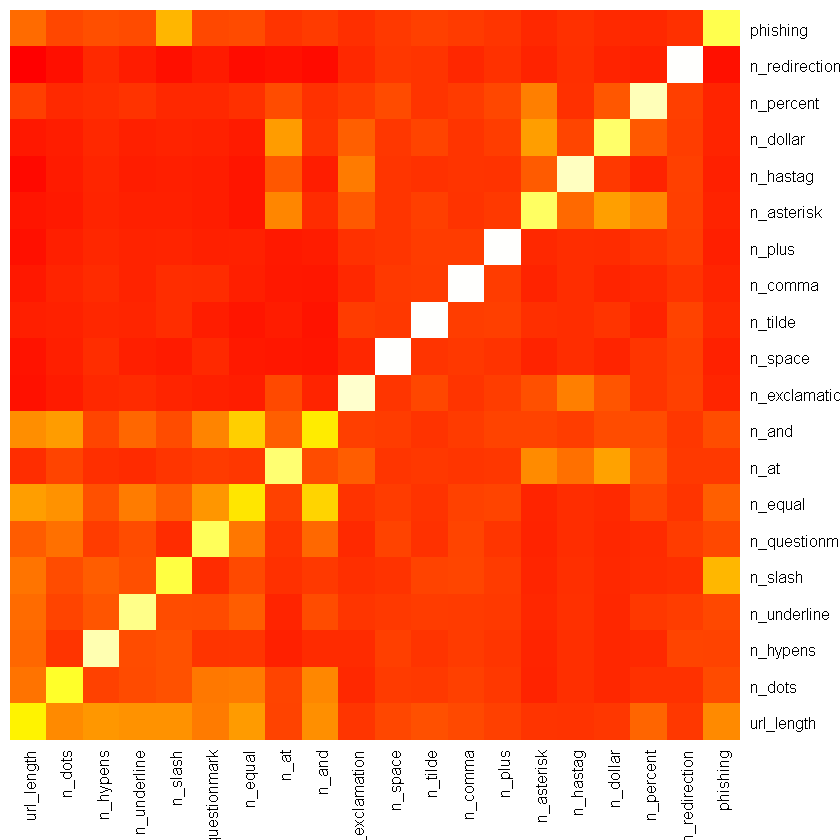

In [13]:
# Calculate the correlation matrix for between variables
numeric_vars <- phishing_data[, sapply(phishing_data, is.numeric)]
cor_matrix <- cor(numeric_vars)

# Visualize the correlation matrix using a heatmap
heatmap(cor_matrix, Rowv=NA, Colv=NA, col = heat.colors(256), scale="column", margins=c(5,5))

In [14]:
print(cor_matrix)

                url_length       n_dots    n_hypens  n_underline      n_slash
url_length      1.00000000  0.458621822 0.410570541  0.429985388  0.466535406
n_dots          0.45862182  1.000000000 0.104591119  0.169993299  0.206035346
n_hypens        0.41057054  0.104591119 1.000000000  0.176698345  0.206569197
n_underline     0.42998539  0.169993299 0.176698345  1.000000000  0.185145334
n_slash         0.46653541  0.206035346 0.206569197  0.185145334  1.000000000
n_questionmark  0.36445718  0.352004118 0.087881708  0.176178323  0.056752326
n_equal         0.64428319  0.488166633 0.159751090  0.349877145  0.255384808
n_at            0.16769348  0.172789058 0.035771951  0.053933436  0.097752738
n_and           0.57312891  0.535716902 0.121238810  0.273608740  0.186415466
n_exclamation   0.05054840  0.003044220 0.013072276  0.052222694  0.027830696
n_space         0.05853339  0.017540238 0.031039234  0.011340713 -0.009641597
n_tilde         0.10576665  0.029186674 0.009241126  0.035892369

In [15]:
# Calculate the correlation of all predictors with the target variable'phishing'
correlations <- cor(phishing_data[, sapply(phishing_data, is.numeric)])
correlation_with_target <- abs(correlations[,'phishing'])

# Sort features by their correlation with 'phishing'
sorted_features <- sort(correlation_with_target, decreasing = TRUE)

# Display the sorted features
sorted_features

phishing        n_slash     url_length        n_equal          n_and 
   1.000000000    0.611472233    0.430125385    0.260461994    0.189172947 
        n_dots    n_underline n_questionmark       n_hypens           n_at 
   0.181884423    0.168304521    0.167044912    0.150413237    0.109055619 
 n_redirection        n_tilde  n_exclamation        n_comma      n_percent 
   0.050821867    0.049616084    0.029358494    0.026512143    0.026116658 
      n_dollar     n_asterisk        n_space       n_hastag         n_plus 
   0.025799072    0.019092407    0.014757371    0.010257474    0.006618931

In [16]:
# Check for outliers using the IQR method
# Identify numeric columns
numeric_columns <- sapply(phishing_data, is.numeric)

# Check for outliers using the IQR method
outliers <- sapply(phishing_data[numeric_columns], function(x) {
  q75 <- quantile(x, 0.75, na.rm = TRUE)
  q25 <- quantile(x, 0.25, na.rm = TRUE)
  iqr <- q75 - q25
  sum(x < (q25 - 1.5 * iqr) | x > (q75 + 1.5 * iqr))
})

outliers

url_length         n_dots       n_hypens    n_underline        n_slash 
          8125          40250          20066           7024           3511 
n_questionmark        n_equal           n_at          n_and  n_exclamation 
          2304           8872           1955           4559            193 
       n_space        n_tilde        n_comma         n_plus     n_asterisk 
           244            293            148            129             67 
      n_hastag       n_dollar      n_percent  n_redirection       phishing 
            11             65           1891           1392              0

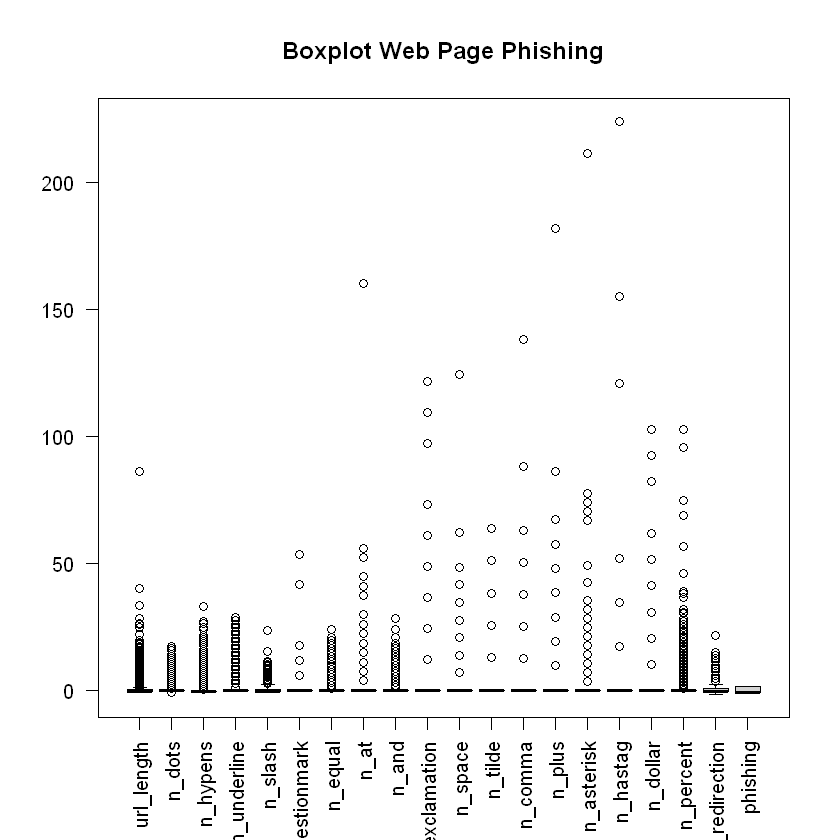

In [17]:
# CREATING A BOX-PLOT TO DISPLAY OUTLIERS 

boxtplot_phishing_data <- as.data.frame(scale(phishing_data))

# Boxplot to visualize the distribution of each column in web_page_phishing
boxplot(boxtplot_phishing_data, outline = TRUE, main = "Boxplot Web Page Phishing", las = 2)

In [18]:
# Remove entire rows where any numeric column is an outlier
phishing_data_clean <- phishing_data
for (col in numeric_columns) {
  q75 <- quantile(phishing_data[[col]], 0.75, na.rm = TRUE)
  q25 <- quantile(phishing_data[[col]], 0.25, na.rm = TRUE)
  iqr <- q75 - q25
  lower_bound <- q25 - 1.5 * iqr
  upper_bound <- q75 + 1.5 * iqr
  # Keep rows that are within the bounds
  phishing_data_clean <- phishing_data_clean[phishing_data_clean[[col]] >= lower_bound & phishing_data_clean[[col]] <= upper_bound, ]
}


In [19]:
nrow(phishing_data_clean)

[1] 91952

**FEATURE ENGINEERING**

In [20]:
# Creating a new feature that sums up all special characters and divides by the URL length
phishing_data_clean <- phishing_data_clean %>%
  mutate(total_special_chars = n_hypens + n_underline + n_slash + n_questionmark + n_equal +
                               n_at + n_and + n_exclamation + n_space + n_tilde + n_comma +
                               n_plus + n_asterisk + n_hastag + n_dollar + n_percent,
         special_chars_ratio = total_special_chars / url_length)


In [21]:
# Feature Selection using Correlation with the target variable

# Calculate the correlation of all predictors with the target variable
correlations <- cor(phishing_data_clean[, sapply(phishing_data_clean, is.numeric)])
correlation_with_target <- abs(correlations[,'phishing'])

# Sort features by their correlation with 'phishing'
sorted_features <- sort(correlation_with_target, decreasing = TRUE)

# Display the sorted features
sorted_features

phishing             n_slash special_chars_ratio total_special_chars 
        1.000000000         0.637207836         0.579879824         0.573345205 
         url_length             n_equal            n_hypens                n_at 
        0.572162628         0.177101864         0.158540368         0.133631683 
        n_underline      n_questionmark               n_and              n_dots 
        0.100106448         0.073274976         0.059986877         0.055481810 
            n_tilde       n_redirection       n_exclamation            n_dollar 
        0.044980526         0.043618212         0.029079051         0.019010993 
            n_space          n_asterisk              n_plus           n_percent 
        0.018773196         0.016328766         0.014543660         0.011786510 
           n_hastag             n_comma 
        0.009631515         0.005086884

In [22]:
print(sorted_features)

           phishing             n_slash special_chars_ratio total_special_chars 
        1.000000000         0.637207836         0.579879824         0.573345205 
         url_length             n_equal            n_hypens                n_at 
        0.572162628         0.177101864         0.158540368         0.133631683 
        n_underline      n_questionmark               n_and              n_dots 
        0.100106448         0.073274976         0.059986877         0.055481810 
            n_tilde       n_redirection       n_exclamation            n_dollar 
        0.044980526         0.043618212         0.029079051         0.019010993 
            n_space          n_asterisk              n_plus           n_percent 
        0.018773196         0.016328766         0.014543660         0.011786510 
           n_hastag             n_comma 
        0.009631515         0.005086884 


In [23]:
# Define a threshold for low correlation
threshold <- 0.03

# Identify features that have a correlation higher than the threshold
features_to_keep <- names(correlation_with_target[correlation_with_target > threshold])
features_to_keep

[1] "url_length"          "n_dots"              "n_hypens"           
 [4] "n_underline"         "n_slash"             "n_questionmark"     
 [7] "n_equal"             "n_at"                "n_and"              
[10] "n_tilde"             "n_redirection"       "phishing"           
[13] "total_special_chars" "special_chars_ratio"

In [24]:
# Subset the data to keep only the features with high enough correlation
phishing_data_high_cor <- phishing_data_clean[, features_to_keep]

# Display the dataset with low-correlation features removed
head(phishing_data_high_cor)

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_tilde,n_redirection,phishing,total_special_chars,special_chars_ratio
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,37,3,0,0,0,0,0,0,0,0,0,0,0,0.00000000
2,77,1,0,0,0,0,0,0,0,0,1,1,0,0.00000000
4,18,2,0,0,0,0,0,0,0,0,1,0,0,0.00000000
5,55,2,2,0,0,0,0,0,0,0,1,0,2,0.03636364
6,32,3,1,0,0,0,0,0,0,0,1,1,1,0.03125000
7,19,2,0,0,0,0,0,0,0,0,1,0,0,0.00000000


In [25]:
# Normalization
library(caret)
dphishing_data <- subset(phishing_data_high_cor,  select = -c(phishing) )

# `preProcess` function can scale and center (standardize) the data
preprocessor <- preProcess(dphishing_data, method = c("center", "scale"))
phishing_data_scaled <- predict(preprocessor, dphishing_data)

Loading required package: lattice



In [26]:
summary(phishing_data_scaled)

   url_length          n_dots            n_hypens        n_underline     
 Min.   :-1.4725   Min.   :-1.39110   Min.   :-0.3383   Min.   :-0.1692  
 1st Qu.:-0.7058   1st Qu.:-0.09629   1st Qu.:-0.3383   1st Qu.:-0.1692  
 Median :-0.4109   Median :-0.09629   Median :-0.3383   Median :-0.1692  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.4737   3rd Qu.:-0.09629   3rd Qu.:-0.3383   3rd Qu.:-0.1692  
 Max.   : 3.1866   Max.   :11.55705   Max.   :24.2567   Max.   :29.5732  
    n_slash        n_questionmark        n_equal             n_at         
 Min.   :-0.6140   Min.   :-0.08231   Min.   :-0.1844   Min.   :-0.09133  
 1st Qu.:-0.6140   1st Qu.:-0.08231   1st Qu.:-0.1844   1st Qu.:-0.09133  
 Median :-0.6140   Median :-0.08231   Median :-0.1844   Median :-0.09133  
 Mean   : 0.0000   Mean   : 0.00000   Mean   : 0.0000   Mean   : 0.00000  
 3rd Qu.: 0.0512   3rd Qu.:-0.08231   3rd Qu.:-0.1844   3rd Qu.:-0.09133  
 Max.   : 7.3683   Max.   :23.56

In [27]:
phishing_data_scaled$phishing<-phishing_data_clean$phishing

In [28]:
phishing_data_summary <- table(phishing_data_scaled$phishing)
phishing_data_summary


    0     1 
62803 29149 

In [29]:
#Splitting Data into Training and Testing Sets
set.seed(123)  # for reproducibility
training_indices <- createDataPartition(phishing_data_scaled$phishing, p = 0.7, list = FALSE)
training_data <- phishing_data_scaled[training_indices, ]
testing_data <- phishing_data_scaled[-training_indices, ]


In [30]:
list(data_train = dim(training_data ), data_test = dim(testing_data))

$data_train
[1] 64367    14

$data_test
[1] 27585    14

In [31]:
training_data_summary <- table(training_data$phishing)
training_data_summary


    0     1 
43928 20439 

**MODEL BUILDING**

In [32]:
library(caret)
library(randomForest)
library(e1071)  # For SVM

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine




In [33]:
# Convert 'phishing' variable to a factor with two levels
training_data$phishing <- factor(training_data$phishing, levels = c(0, 1))


In [34]:
#Random Forest
# Train the model
rf_model <- randomForest(phishing ~ ., data = training_data, ntree = 100)
rf_model


Call:
 randomForest(formula = phishing ~ ., data = training_data, ntree = 100) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 3

        OOB estimate of  error rate: 11.39%
Confusion matrix:
      0     1 class.error
0 40854  3074  0.06997815
1  4259 16180  0.20837614

In [35]:
#svm
# Train the model
svm_model <- svm(phishing ~ ., data = training_data, kernel = "radial")
svm_model


Call:
svm(formula = phishing ~ ., data = training_data, kernel = "radial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1 

Number of Support Vectors:  18186


In [36]:
# Ensure 'phishing' is a factor with two levels: 0 and 1
testing_data$phishing <- factor(testing_data$phishing, levels = c(0, 1))

In [41]:
# Evaluate Random Forest

# Predict and evaluate the model
rf_predictions <- predict(rf_model, testing_data)
rf_results <- confusionMatrix(rf_predictions, testing_data$phishing)
#rf_results

In [51]:
# Evaluate SVM
# Predict and evaluate the model
svm_predictions <- predict(svm_model, testing_data)
svm_results <- confusionMatrix(svm_predictions, testing_data$phishing)
#svm_results

In [52]:
# Print Random Forest metrics
print(rf_results)
print(paste("Accuracy:", rf_results$overall['Accuracy']))
print(paste("Precision:", rf_results$byClass['Precision']))
print(paste("Recall:", rf_results$byClass['Recall']))
print(paste("F1 Score:", rf_results$byClass['F1']))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 17601  1817
         1  1274  6893
                                          
               Accuracy : 0.8879          
                 95% CI : (0.8842, 0.8916)
    No Information Rate : 0.6842          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7363          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9325          
            Specificity : 0.7914          
         Pos Pred Value : 0.9064          
         Neg Pred Value : 0.8440          
             Prevalence : 0.6842          
         Detection Rate : 0.6381          
   Detection Prevalence : 0.7039          
      Balanced Accuracy : 0.8619          
                                          
       'Positive' Class : 0               
                  

[1] "F1 Score: 0.919280286214191"


In [45]:
# Print SVM metrics
print(svm_results)
print(paste("Accuracy:", svm_results$overall['Accuracy']))
print(paste("Precision:", svm_results$byClass['Precision']))
print(paste("Recall:", svm_results$byClass['Recall']))
print(paste("F1 Score:", svm_results$byClass['F1']))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 17424  1797
         1  1451  6913
                                         
               Accuracy : 0.8823         
                 95% CI : (0.8784, 0.886)
    No Information Rate : 0.6842         
    P-Value [Acc > NIR] : < 2.2e-16      
                                         
                  Kappa : 0.7246         
                                         
 Mcnemar's Test P-Value : 1.417e-09      
                                         
            Sensitivity : 0.9231         
            Specificity : 0.7937         
         Pos Pred Value : 0.9065         
         Neg Pred Value : 0.8265         
             Prevalence : 0.6842         
         Detection Rate : 0.6316         
   Detection Prevalence : 0.6968         
      Balanced Accuracy : 0.8584         
                                         
       'Positive' Class : 0              
                                      